    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

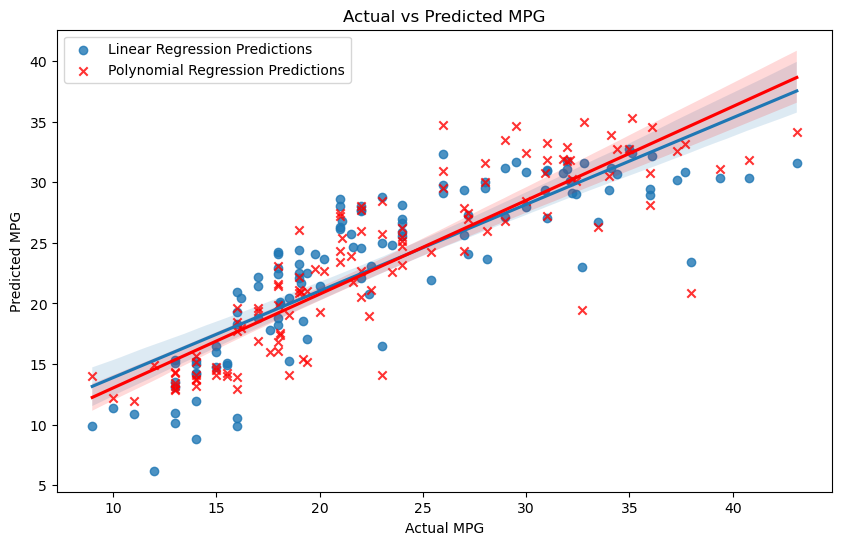

In [30]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

# Data Overview
print(df.head())
print(df.info())
print(df.describe())

# Data Preprocessing
df = df.dropna()  # Remove missing values
y = df['mpg']  # Target variable
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]  # Features

# Scaling Data
ss = StandardScaler()
X = ss.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model Coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# Predict Test Data
y_pred = lr.predict(X_test)

# Model Accuracy
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

# Polynomial Regression
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

# Fit the Polynomial Regression Model
lr.fit(X_train2, y_train)

# Predict Test Data for Polynomial Regression
y_pred_poly = lr.predict(X_test2)

# Model Accuracy for Polynomial Regression
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Mean Absolute Error:", mae_poly)
print("Polynomial Regression Mean Absolute Percentage Error:", mape_poly)
print("Polynomial Regression R² Score:", r2_poly)

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, marker='o', label='Linear Regression Predictions')
sns.regplot(x=y_test, y=y_pred_poly, marker='x', color='red', label='Polynomial Regression Predictions')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.legend()
plt.show()


In [32]:
#applying the random forest regression 

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict using the best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
R² Score: 0.7730029067213227


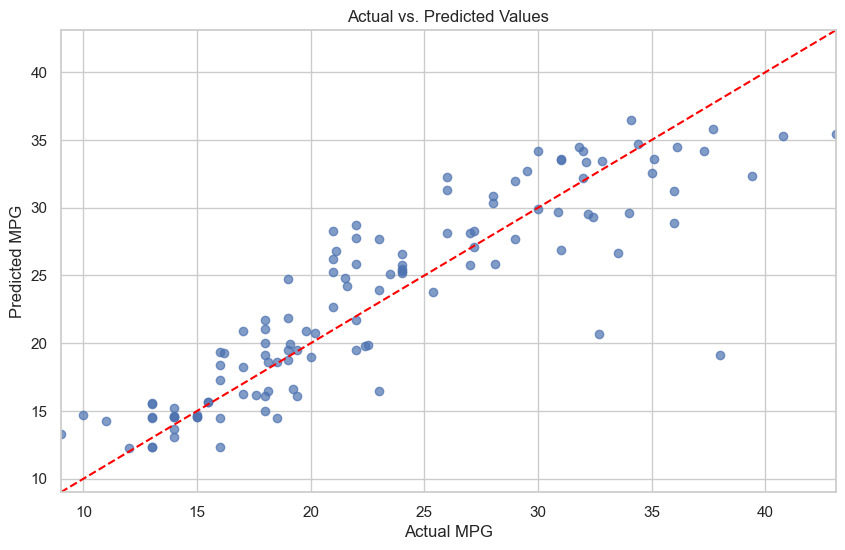

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
R² Score: 0.7730029067213227


In [38]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Set the style for seaborn
sns.set(style='whitegrid')

# 1. Plot Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()


# Print Best Parameters and R² Score
print("Best parameters found: ", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
